### Introduction

This Jupyter Notebook explores the relationship between various vehicle attributes and fuel efficiency, measured in miles per gallon (MPG). 
I'll be using the classic Auto MPG dataset, sourced from the UCI Machine Learning Repository, to build and evaluate a linear regression model.

The Auto MPG dataset provides a valuable opportunity to:

* Apply fundamental concepts of linear regression.
* Investigate the impact of features like engine size, weight, and horsepower on fuel economy.
* Gain practical experience in data exploration, model building, and performance evaluation.

Dataset Details:
 - Dataset: UCI Machine Learning Repository
 - Data link : 

### Predicting Fuel Efficiency: A Linear Regression Analysis of the Auto MPG Dataset

By the end of this analysis, A model will be created that can predict a car's MPG based on its characteristics, along with insights into the factors that contribute to fuel efficiency. This notebook aims to provide a clear and concise walkthrough of the linear regression process, suitable for those new to machine learning.


### Import Required Libraries

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

### Load the Dataset
We load the Auto MPG dataset and inspect its shape and structure.

In [108]:
df = pd.read_csv('auto-mpg.csv',na_values="?")
df.shape

(398, 9)

### Exploratory Data Analysis

In [109]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


Lets look at the count of unique values in the dataset

In [110]:
unique_value_count = pd.DataFrame({'Column':df.columns,
                                   'Unique_Value_counts': [df[i].nunique() for i in df.columns]})

unique_value_count.sort_values('Unique_Value_counts', ascending=False, inplace=True)
unique_value_count

,Column,Unique_Value_counts
4,weight,351
8,car name,305
0,mpg,129
5,acceleration,95
3,horsepower,93
2,displacement,82
6,model year,13
1,cylinders,5
7,origin,3


In [111]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


Checking columns for any NULL values

In [112]:
df.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

Only Horsepower column has NULL values. Rest looks good

In [113]:
df[df['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


Before replacing the NULL values, Lets look at its distribution.

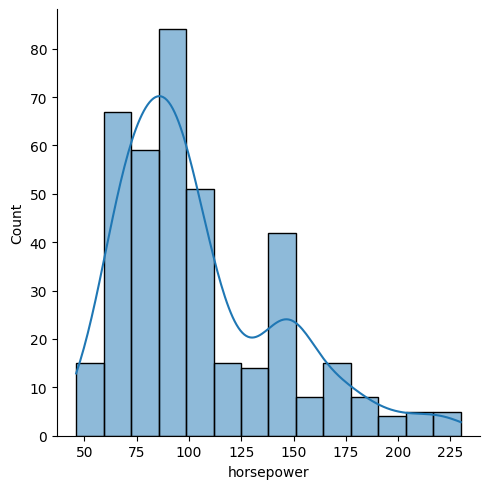

In [114]:
sns.displot(df['horsepower'], kde=True)

In [115]:
df['horsepower'].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [116]:
print(df['horsepower'].skew())

1.0873262824048695


The distribution of horsepower is positively skewed. So, lets replace the mising value with its median.

In [117]:
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

In [118]:
df.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

Now, Lets drop unnecessary columns

In [119]:
df.drop('car name',axis=1,inplace=True)
df.shape

(398, 8)

In [120]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

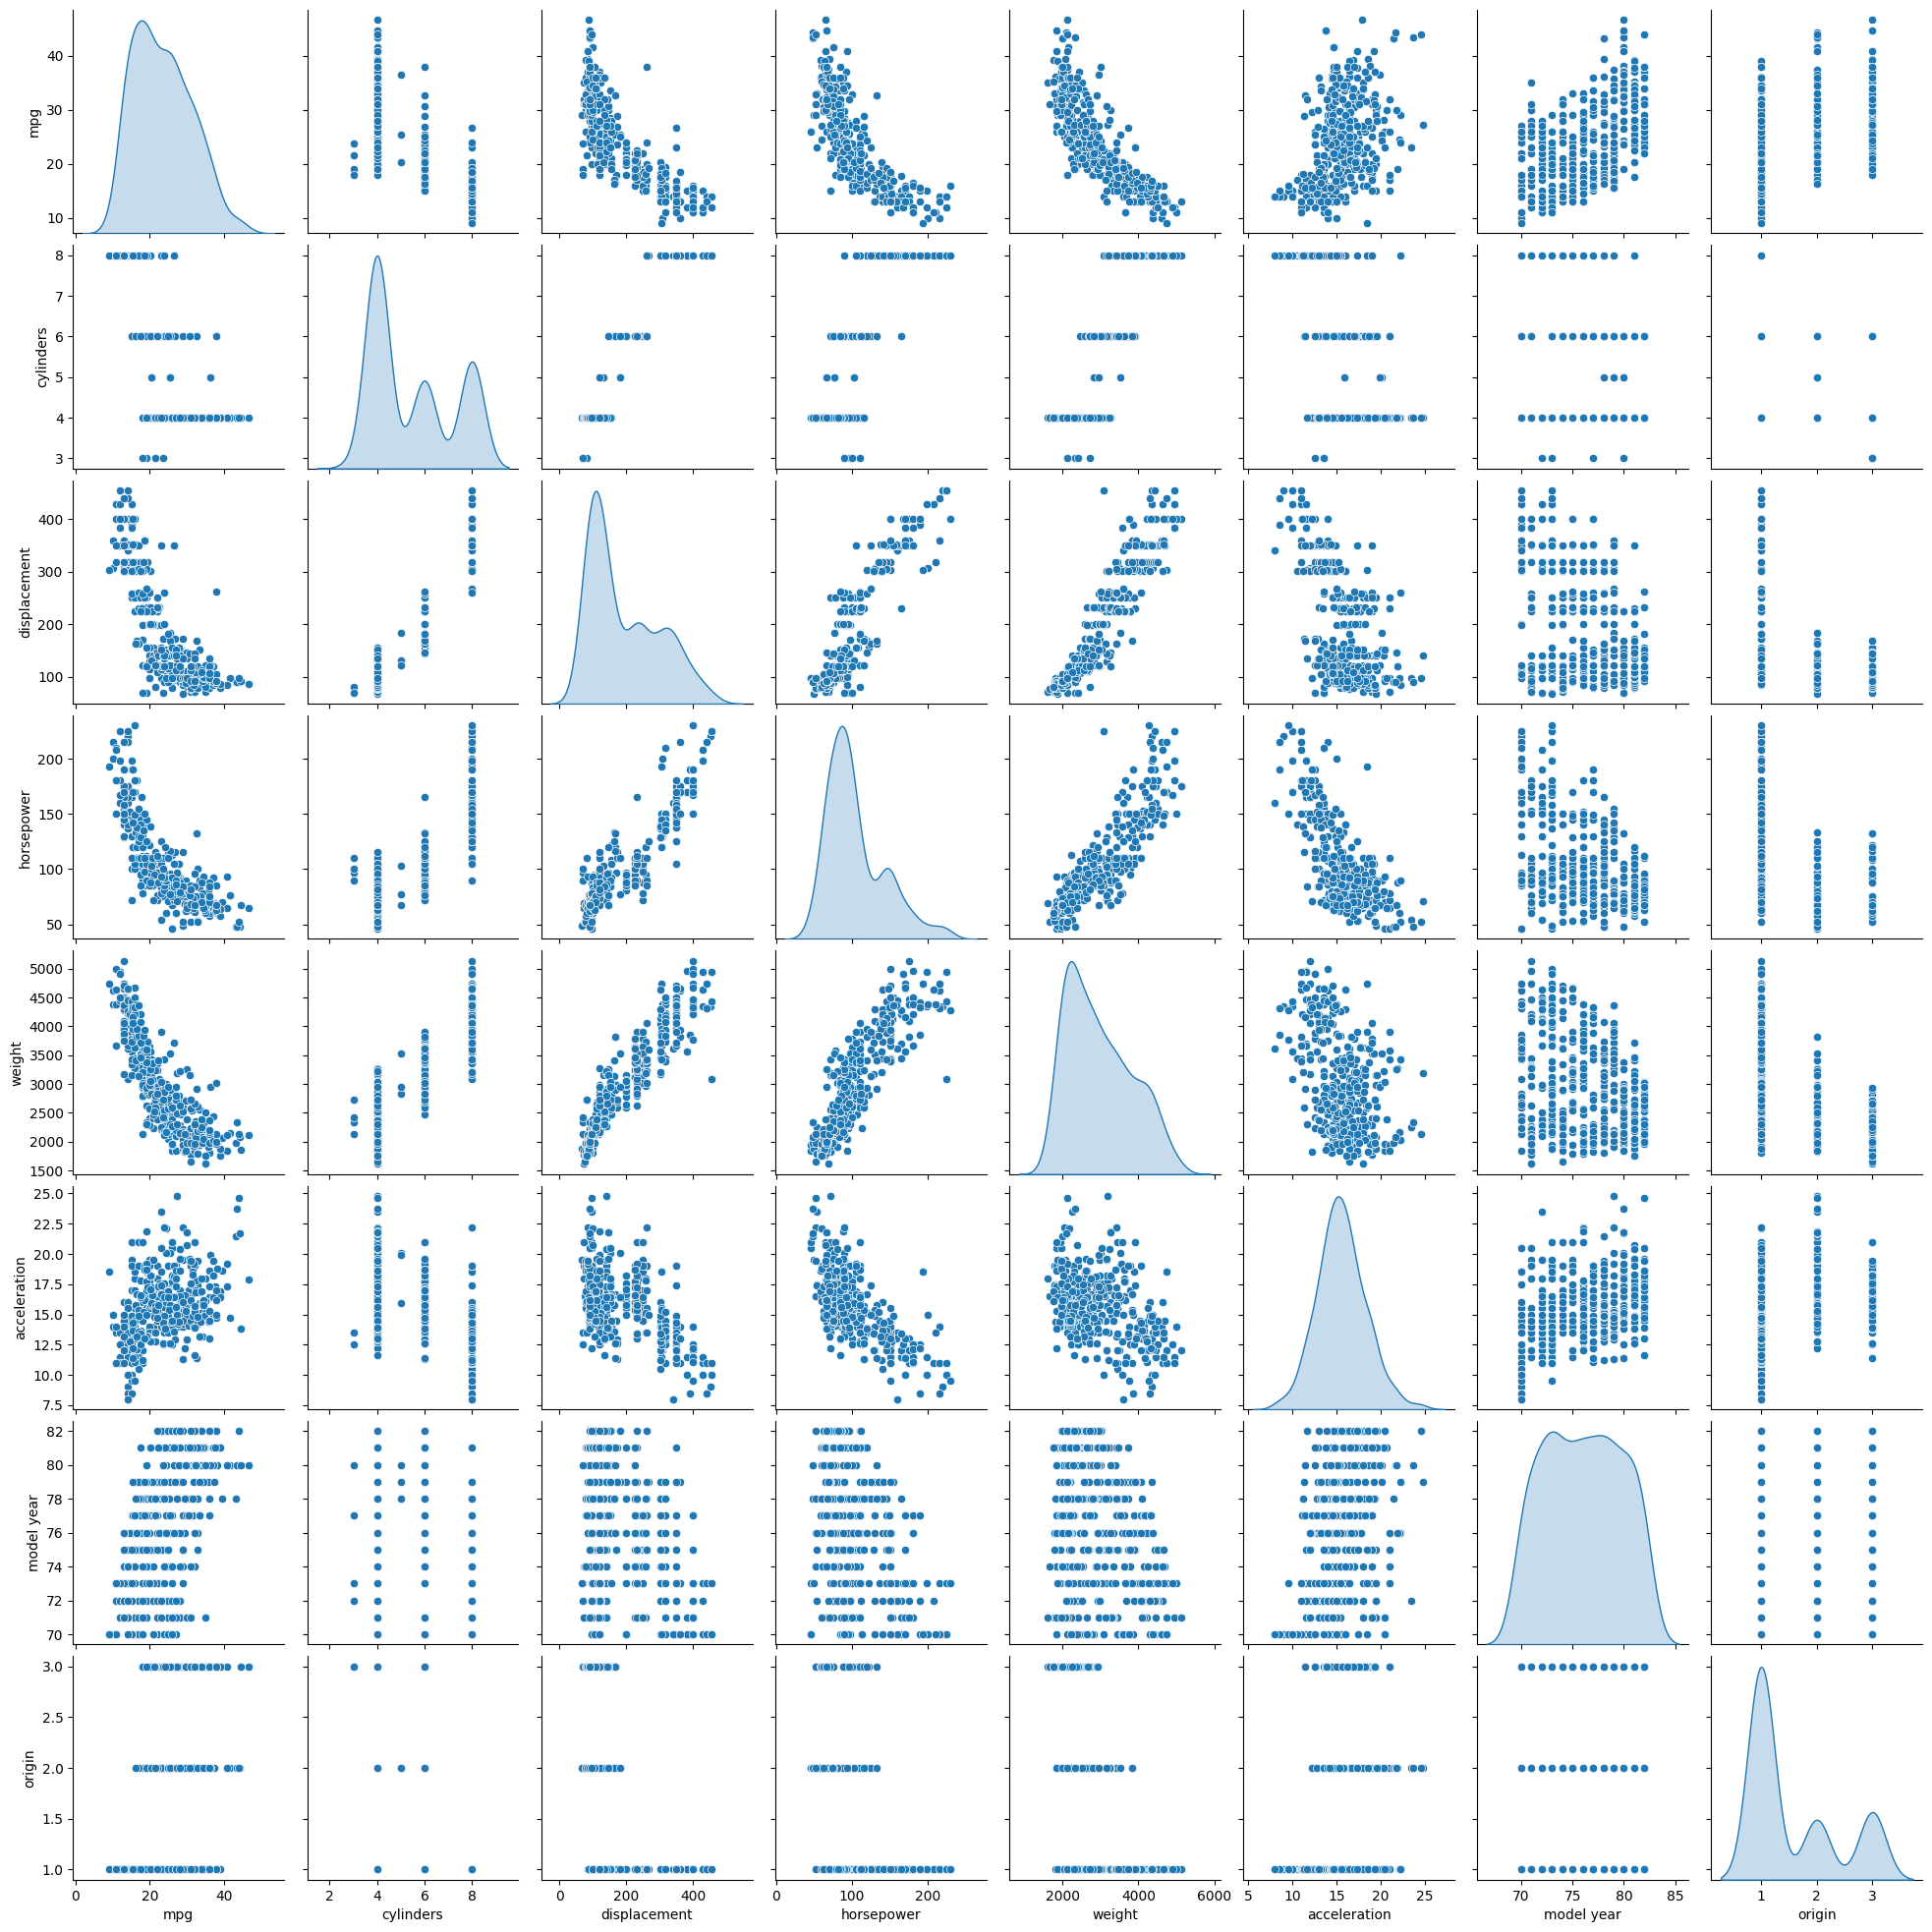

In [121]:
sns.pairplot(df, diag_kind='kde')

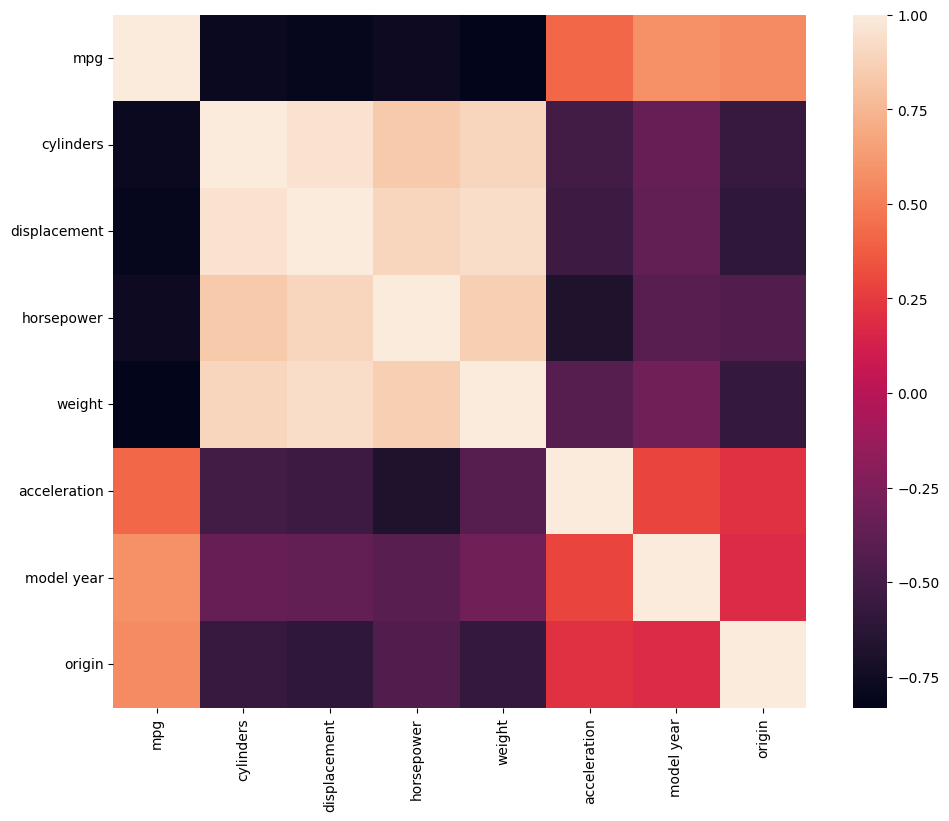

In [122]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

In [143]:
print(corrmat)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.773453 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.841284  0.896017   
displacement -0.804203   0.950721      1.000000    0.895778  0.932824   
horsepower   -0.773453   0.841284      0.895778    1.000000  0.862442   
weight       -0.831741   0.896017      0.932824    0.862442  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.686590 -0.417457   
model year    0.579267  -0.348746     -0.370164   -0.413733 -0.306564   
origin        0.563450  -0.562543     -0.609409   -0.452096 -0.581024   

              acceleration  model year    origin  
mpg               0.420289    0.579267  0.563450  
cylinders        -0.505419   -0.348746 -0.562543  
displacement     -0.543684   -0.370164 -0.609409  
horsepower       -0.686590   -0.413733 -0.452096  
weight           -0.417457   -0.306564 -0.581024  
acceleration      1.000000    0.2881

In [142]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


mpg feature is highly Negatively correlated with Weight, Displacement, Horsepower & Cylinders.
Also, the features Origin & Model Year seem to be a noise to the data set. So lets drop them.

In [124]:
# df.drop(['origin','model year'], axis=1, inplace=True)

In [125]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

### Model Building

In [126]:
X = df.drop(['mpg'], axis=1)
y = df[['mpg']]

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [128]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [129]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is -0.3933914726185952
The coefficient for displacement is 0.022818948562679426
The coefficient for horsepower is -0.019872884299422692
The coefficient for weight is -0.007040899059965791
The coefficient for acceleration is 0.06119510660375068
The coefficient for model year is 0.7925439069034936
The coefficient for origin is 1.1988857702565219


In [133]:
intercept = regression_model.intercept_[0]
print("The intercept if the model is {}".format(intercept))

The intercept if the model is -18.74555950095773


In [134]:
training_score = regression_model.score(X_train, y_train)
print(f'Training Score: {training_score:.2f}')

Training Score: 0.81


In [135]:
testing_score = regression_model.score(X_test, y_test)
print(f'Testing Score: {testing_score:.2f}')

Testing Score: 0.85


In [145]:
print(f'The linear regression model achieved a training score of {training_score:.2f} and a testing score of {testing_score:.2f}')

The linear regression model achieved a training score of 0.81 and a testing score of 0.85


### Feature Importance

        Feature  Importance
6        origin    1.198886
5    model year    0.792544
0     cylinders    0.393391
4  acceleration    0.061195
1  displacement    0.022819
2    horsepower    0.019873
3        weight    0.007041


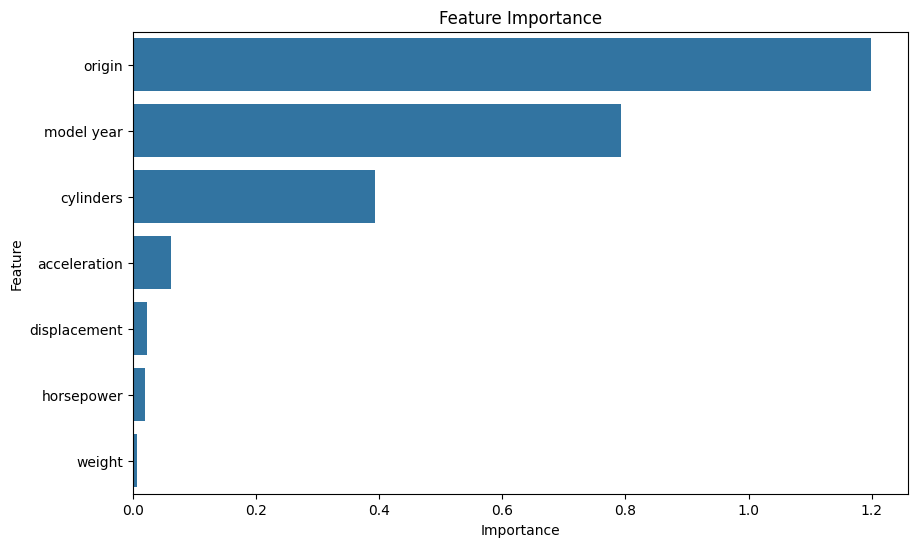

In [147]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': abs(regression_model.coef_[0])
})

feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

### Conclusion:
While correlation provides insights into the relationships between features and the target variable, feature importance reflects the model's actual reliance on each feature. 

In this case, 
<ol> 
    <li>Though the features weight and displacement had stronger correlations with mpg</li>
    <li>Origin and model year features were the most impactful predictors in the linear regression model</li>
</ol>